**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('most-streamed-spotify-songs-2024.csv', encoding = 'latin1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


**DATA UNDERSTANDING AND CLEANING**

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.columns)

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')


In [5]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

In [6]:
cols_to_drop = [
    'spotify_playlist_count', 'spotify_playlist_reach', 'youtube_playlist_reach', 'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins', 'deezer_playlist_count', 'deezer_playlist_reach', 'amazon_playlist_count', 'tidal_popularity', 'tiktok_posts', 'tiktok_likes', 'tiktok_views'
]
df.drop(columns = cols_to_drop, inplace = True)

In [7]:
print(df.columns)

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams', 'spotify_popularity',
       'youtube_views', 'youtube_likes', 'pandora_streams',
       'pandora_track_stations', 'soundcloud_streams', 'shazam_counts',
       'explicit_track'],
      dtype='object')


In [8]:
df.isnull().sum()

track                        0
album_name                   0
artist                       5
release_date                 0
isrc                         0
all_time_rank                0
track_score                  0
spotify_streams            113
spotify_popularity         804
youtube_views              308
youtube_likes              315
pandora_streams           1106
pandora_track_stations    1268
soundcloud_streams        3333
shazam_counts              577
explicit_track               0
dtype: int64

In [9]:
#dropping rows where artist is null
df = df.dropna(subset = ['artist'])

#list of numerical cols to fill
num_cols = [
    'spotify_streams', 'spotify_popularity', 'youtube_views', 'youtube_likes', 'pandora_streams', 'pandora_track_stations', 'soundcloud_streams', 'shazam_counts'
]

#removing commas and converting to float
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

#filling numerical nulls with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [10]:
df.isnull().sum()

track                     0
album_name                0
artist                    0
release_date              0
isrc                      0
all_time_rank             0
track_score               0
spotify_streams           0
spotify_popularity        0
youtube_views             0
youtube_likes             0
pandora_streams           0
pandora_track_stations    0
soundcloud_streams        0
shazam_counts             0
explicit_track            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

np.int64(0)

**HANDLING OUTLIERS**

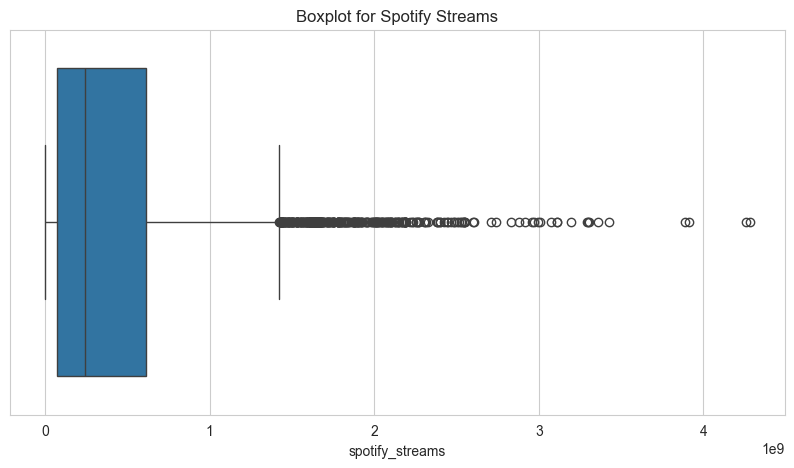

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'spotify_streams', data = df)
plt.title('Boxplot for Spotify Streams')
plt.show()

In [15]:
Q1 = df['spotify_streams'].quantile(0.25)
Q3 = df['spotify_streams'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filtering the data to remove outliers
df = df[(df['spotify_streams'] >= lower_bound) & (df['spotify_streams'] <= upper_bound)]

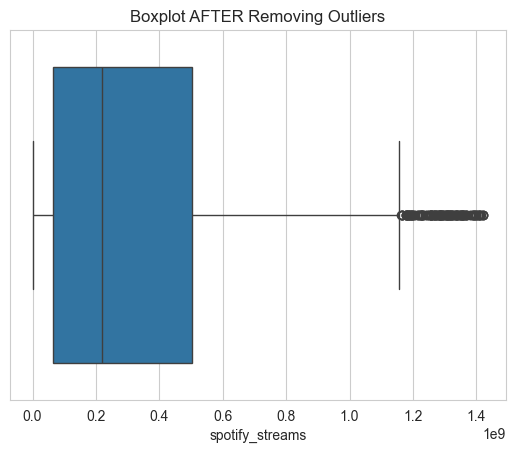

In [16]:
sns.boxplot(x = 'spotify_streams', data = df)
plt.title("Boxplot AFTER Removing Outliers")
plt.show()

**TRACK AND ARTIST ANALYSIS & VISUALISATION**

**1. TOP 10 TRACKS BY SPOTIFY STREAMS**

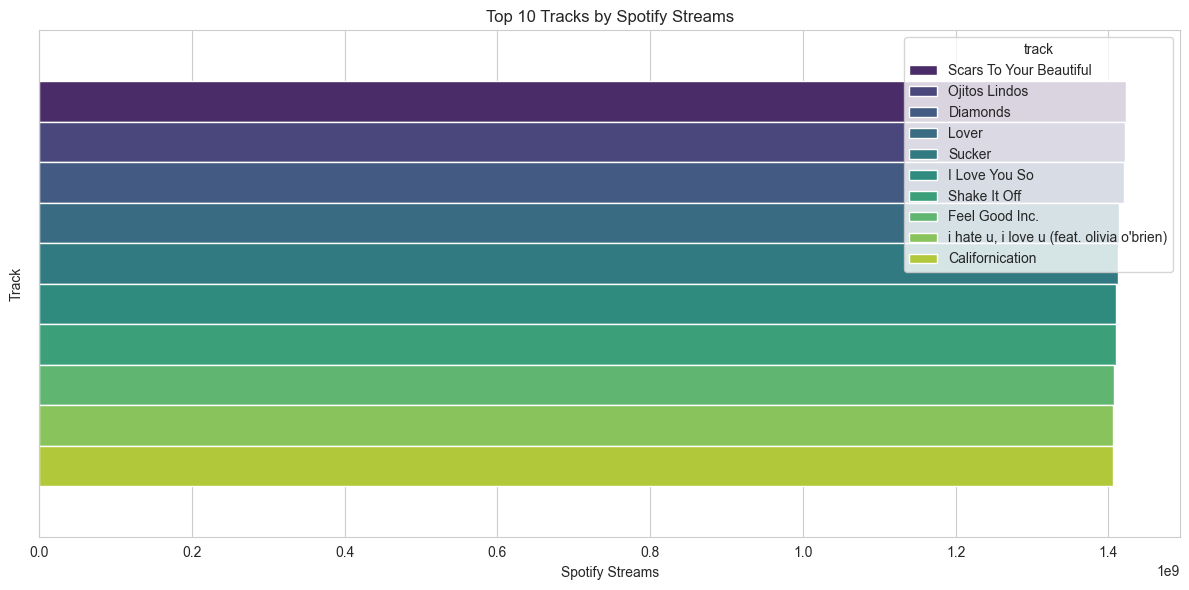

In [47]:
top_tracks = df.sort_values(by = 'spotify_streams', ascending = False).head(10)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'spotify_streams', hue = 'track', data = top_tracks, palette = 'viridis')
plt.title('Top 10 Tracks by Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Track')
plt.tight_layout()
plt.savefig('assets/top_tracks.png')

plt.show()

**2. TOP 10 ARTISTS BY TOTAL SPOTIFY STREAMS**

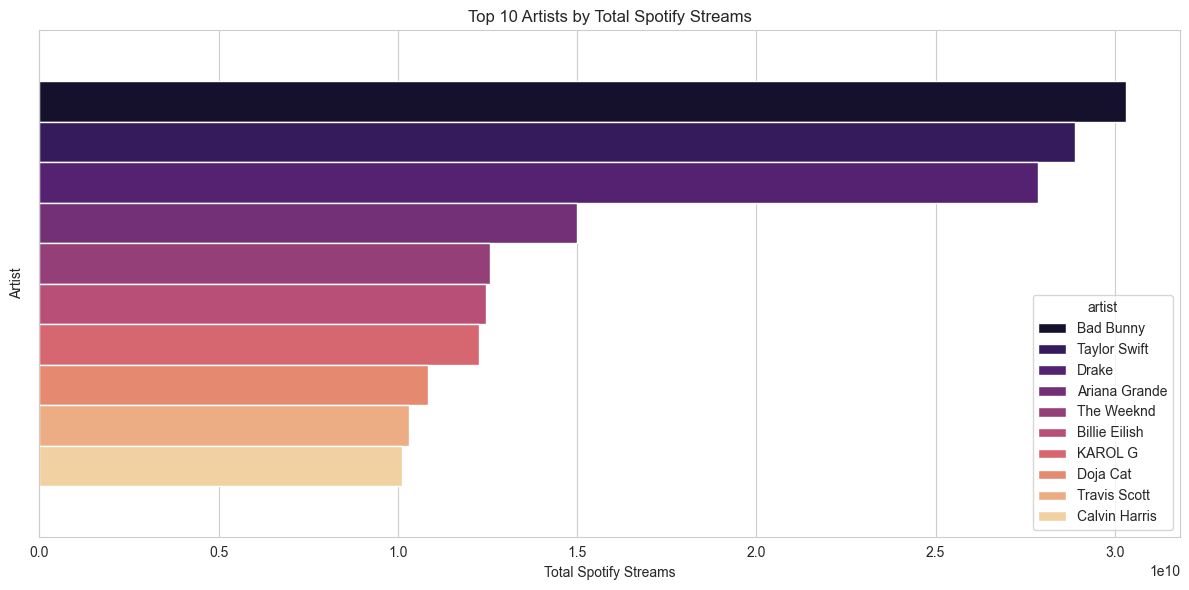

In [48]:
top_artists = df.groupby('artist')['spotify_streams'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12, 6))
sns.barplot(x = top_artists.values, hue = top_artists.index, palette = 'magma')
plt.title('Top 10 Artists by Total Spotify Streams')
plt.xlabel('Total Spotify Streams')
plt.ylabel('Artist')
plt.tight_layout()
plt.savefig('assets/top_artists.png')

plt.show()

**RELEASE DATA & POPULARITY TRENDS**

In [19]:
df['release_year'] = df['release_date'].dt.year

**3. Visualise Number Of Songs Released per year**

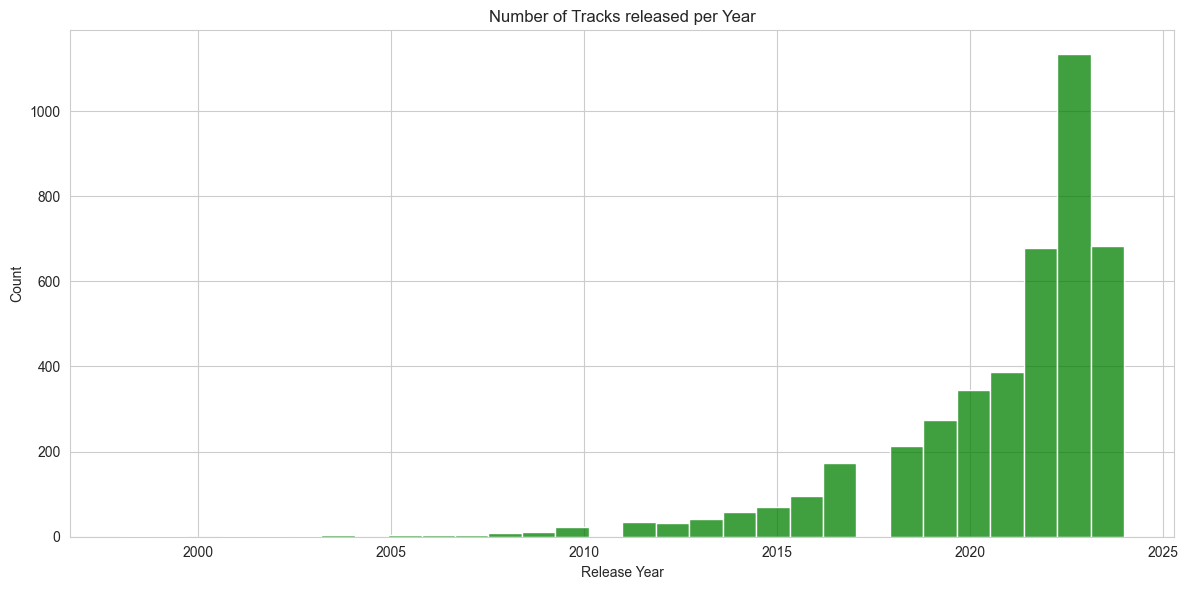

In [49]:
plt.figure(figsize = (12, 6))
sns.histplot(x = 'release_year', bins = 30, kde = False, color = 'green', data = df)
plt.title('Number of Tracks released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('assets/tracks_per_year.png')

plt.show()

**4. Comparison Of Average Spotify Popularity per year**

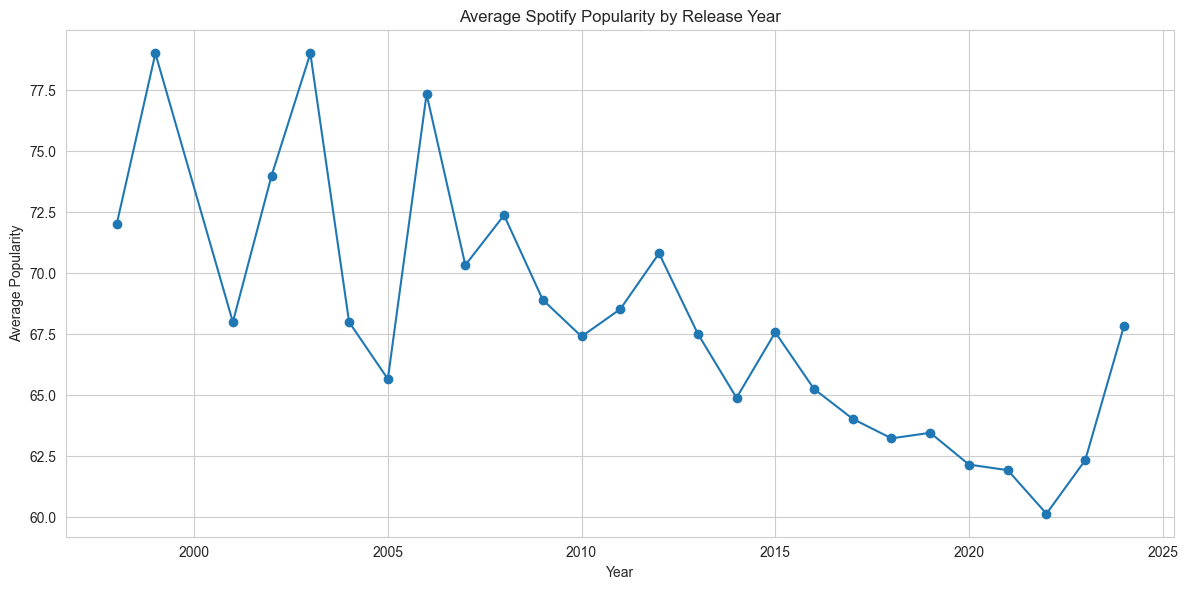

In [50]:
popularity_by_year = df.groupby('release_year')['spotify_popularity'].mean()

plt.figure(figsize = (12, 6))
popularity_by_year.plot(kind = 'line', marker = 'o')
plt.title('Average Spotify Popularity by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.tight_layout()
plt.savefig('assets/spotify_popularity.png')

plt.show()

**5. TOP 10 ARTISTS BY TOTAL STREAMS**

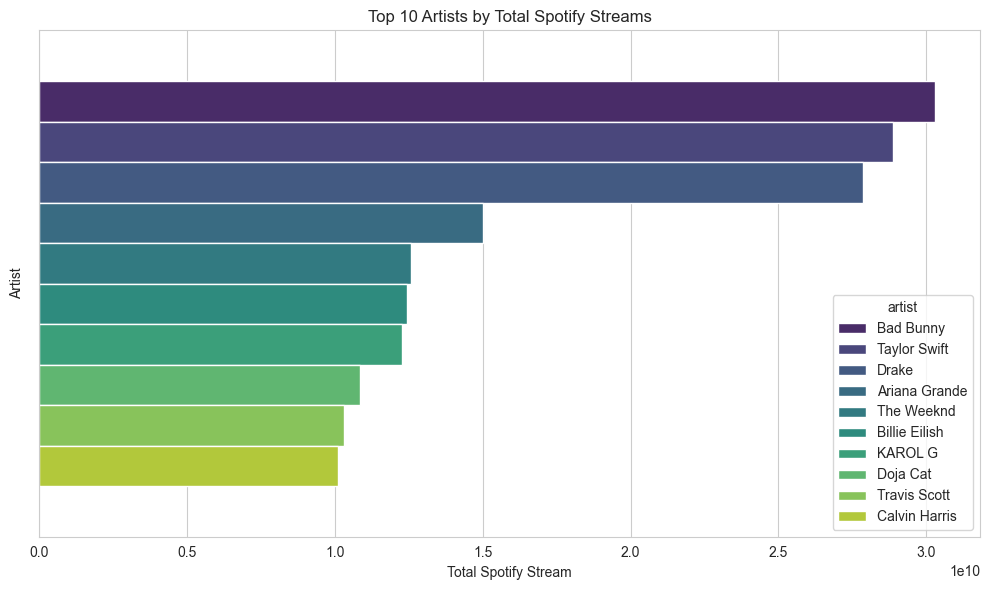

In [23]:
top_artists = df.groupby('artist')['spotify_streams'].sum().sort_values(ascending = False).head(10).reset_index()

plt.figure(figsize = (10, 6))
sns.barplot(x = 'spotify_streams', hue = 'artist', data = top_artists, palette = 'viridis')
plt.title('Top 10 Artists by Total Spotify Streams')
plt.xlabel('Total Spotify Stream')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

**6. EXPLICIT VS NON EXPLICIT**

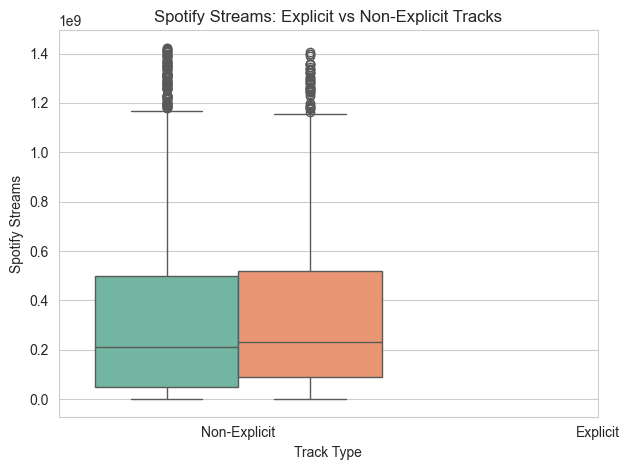

In [51]:
# plt.figure(figsize = (8, 6))
sns.boxplot(hue = 'explicit_track', y = 'spotify_streams', data = df, palette = 'Set2', legend = False)
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.title('Spotify Streams: Explicit vs Non-Explicit Tracks')
plt.xlabel('Track Type')
plt.ylabel('Spotify Streams')
plt.tight_layout()
plt.savefig('assets/explicit_nonexplicit.png')

plt.show()

**7. STREAMING COMPARISON ACROSS VARIOUS PLATFORMS**

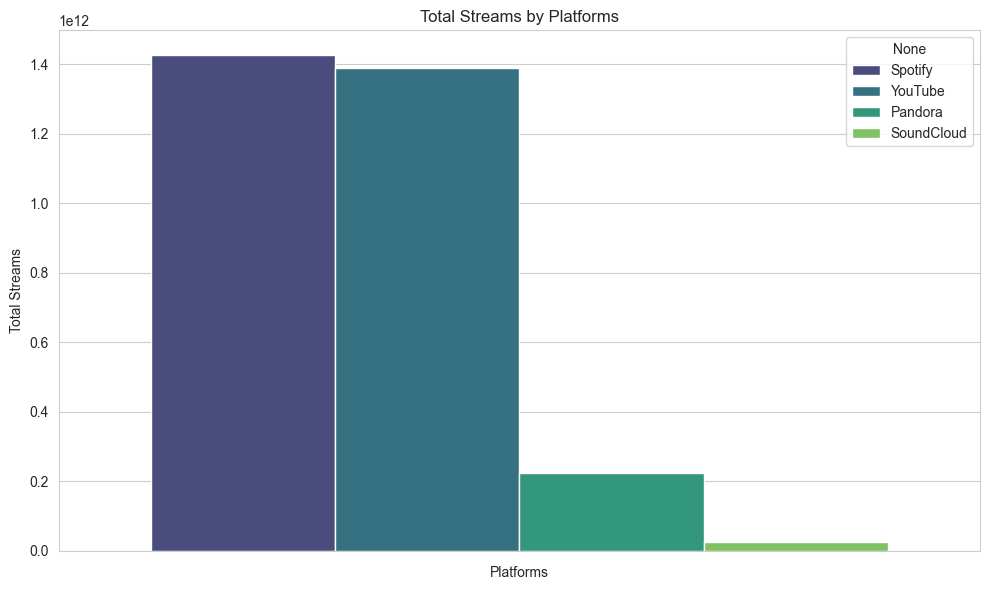

In [52]:
platforms = {
    'Spotify': df['spotify_streams'].sum(),
    'YouTube': df['youtube_views'].sum(),
    'Pandora': df['pandora_streams'].sum(),
    'SoundCloud': df['soundcloud_streams'].sum()
}

platform_df = pd.DataFrame.from_dict(platforms, orient='index', columns= ['Total Streams']).sort_values(by= 'Total Streams', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(hue = platform_df.index, y = 'Total Streams', data = platform_df, palette='viridis')
plt.title('Total Streams by Platforms')
plt.xlabel('Platforms')
plt.ylabel('Total Streams')
plt.tight_layout()
plt.savefig('assets/platform_streams.png')

plt.show()

In [43]:
df.to_csv('spotify_cleaned.csv', index = False)